In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={"axes.facecolor":"white", "axes.edgecolor":"black"})
import re

In [16]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [21]:
# 탐색적 분석(EDA:Exploratory Data Analysis)
train.head(10)
train.info() # 결측값이 있는지 확인해볼 수 있음
test.info() # survived를 예측해야하기 때문에 survived 열이 빠져있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [24]:
train.isnull().sum()
train.describe() # 데이터 요약

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
train.groupby("Sex")['Survived'].mean() 
train.groupby("Sex")[['Survived']].mean() #[[]] 데이터프레임으로 출력

,Survived
Sex,
female,0.742038
male,0.188908


In [28]:
train.pivot_table(index='Sex',values='Survived',aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


In [30]:
train.pivot_table(index='Sex')

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Sex,,,,,,,
female,27.915709,44.479818,0.649682,431.028662,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,454.147314,2.389948,0.429809,0.188908


In [31]:
train.groupby('Sex')['Survived'].describe() 

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


In [34]:
#성별, 선실등급별 생존률 출력
train.groupby(['Sex','Pclass'])[['Survived']].mean()

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [36]:
train.pivot_table(index=['Sex','Pclass'], values='Survived',aggfunc=np.mean)
train.pivot_table('Survived',['Sex','Pclass'],aggfunc=np.mean)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [40]:
test['Survived']=(test.Sex=='female') & (test.Age>0) & (test.Embarked)
test.head()
test.isnull().sum() 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [42]:
submission=test[['PassengerId','Survived']].copy()
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null bool
dtypes: bool(1), int64(1)
memory usage: 3.8 KB


In [50]:
submission['Survived']=submission['Survived'].astype(int)
submission.head()
submission.to_csv("submission.csv",index=False)

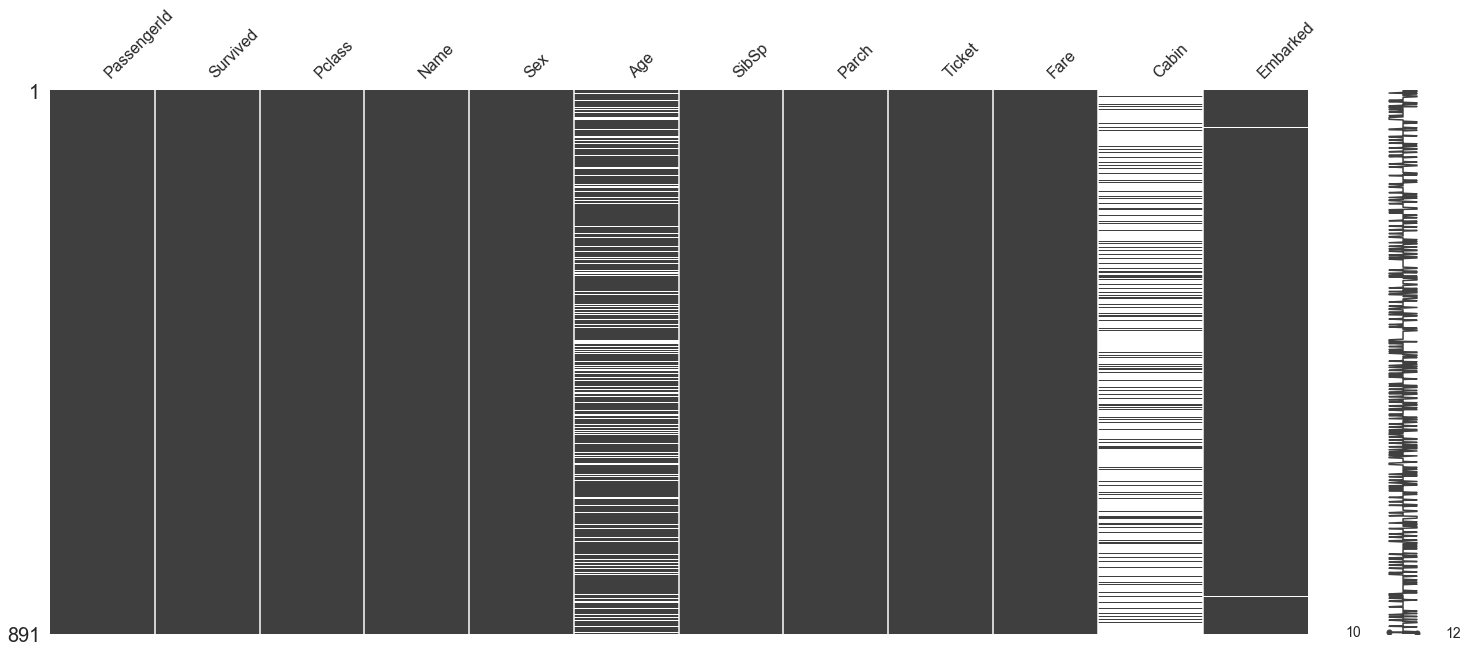

In [51]:
#anaconda prompt에서 pip install missingno 설치하기
train.columns
import missingno as msno # NaN 데이터를 시각화해줌
msno.matrix(train)

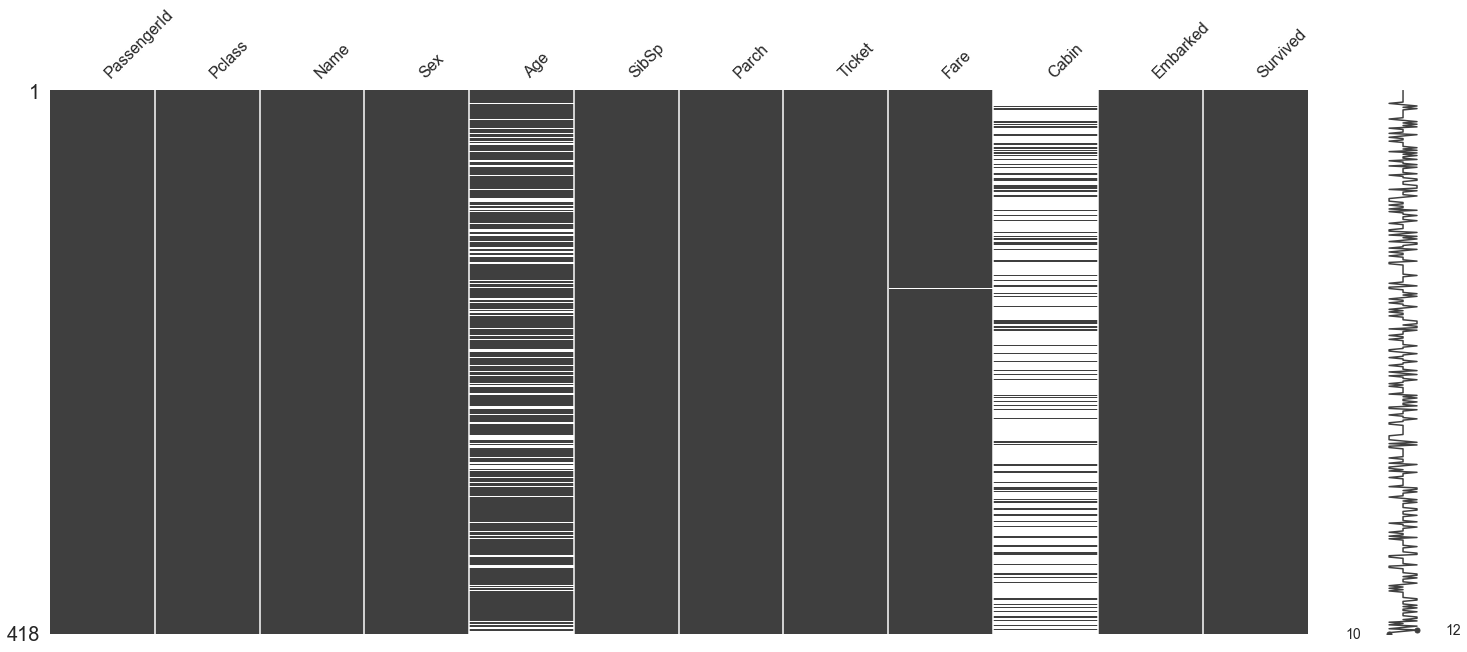

In [52]:
msno.matrix(test)

In [64]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

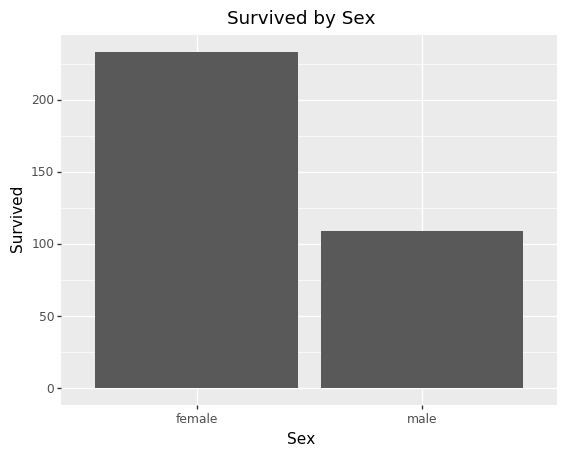

<ggplot: (146138131120)>

In [66]:
# anaconda prompt에서 pip install plotnine 설치
from plotnine import *
(ggplot(train)
+ aes(x="Sex",y="Survived")
+ geom_col()
+ ggtitle('Survived by Sex')
+ theme(text=element_text(family='NanumBarunGothic'))
)

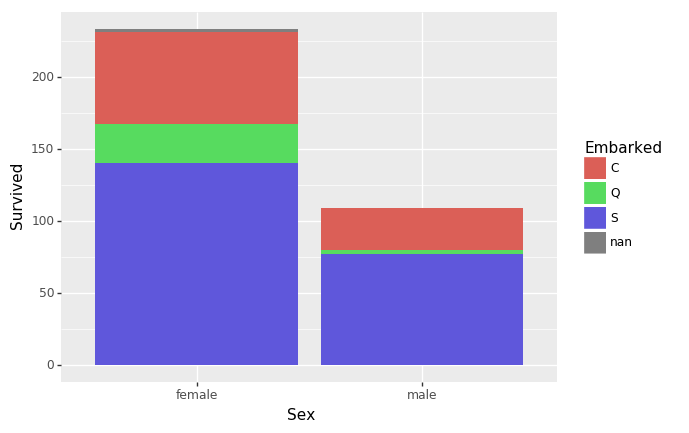

<ggplot: (146138175594)>

In [69]:
(ggplot(train)
+ aes(x='Sex',y='Survived',fill='Embarked')
+ geom_col()
)

In [78]:
# Pclass 별로 데이터 건수 출력
train['Pclass'].value_counts()
train.info()
# pclass(정수 -> 문자형)
train['Pclass']=train['Pclass'].astype(str) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


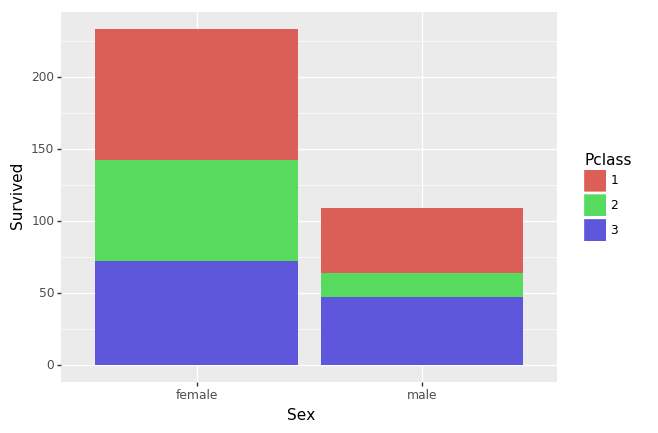

<ggplot: (146139595482)>

In [79]:
(ggplot(train)
+ aes(x='Sex',y='Survived',fill='Pclass')
+ geom_col()
)

In [80]:
train_drop_age=train['Age'].dropna()
train_drop_age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
18     31.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
27     19.0
30     40.0
33     66.0
34     28.0
35     42.0
37     21.0
38     18.0
       ... 
856    45.0
857    51.0
858    24.0
860    41.0
861    21.0
862    48.0
864    24.0
865    42.0
866    27.0
867    31.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

### 결정트리
- 파이썬 라이브러리를 활용한 머신러닝 p.101
- 핸즈온 머신러닝 p.225

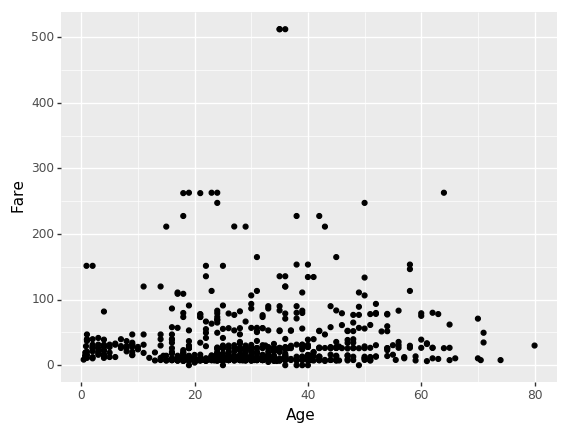

<ggplot: (-9223371890715174645)>

In [85]:
(ggplot(train)
+ aes(x='Age',y='Fare')
+ geom_point()
)

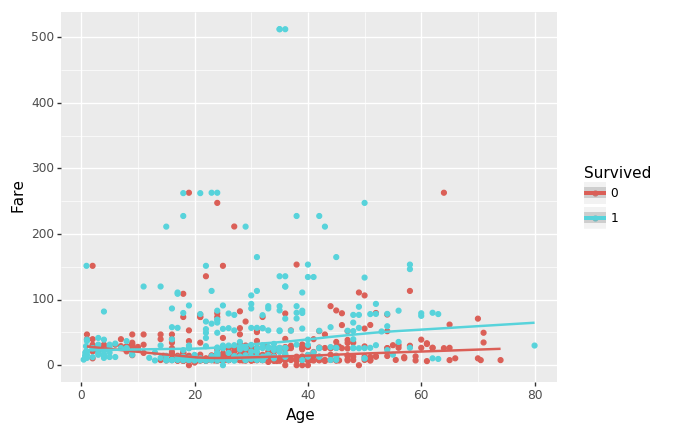

<ggplot: (-9223371890713718966)>

In [92]:
# 연령대(x)와 운임(y) 생존률 시각화
# 생존률이 숫자형이라 시각화 했을 때 범례에 범위가 지정되므로 카테고리형으로 변환 후 시각화하기 
train['Survived']=train['Survived'].astype('category')
(ggplot(train)
+ aes(x='Age',y='Fare',color='Survived')
+ geom_point()
+ stat_smooth()
)

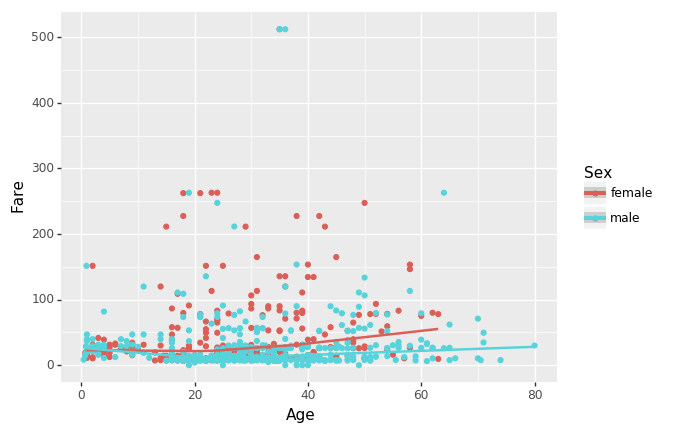

<ggplot: (-9223371890713719608)>

In [89]:
(ggplot(train)
+ aes(x='Age',y='Fare',color='Sex')
+ geom_point()
+ stat_smooth()
)

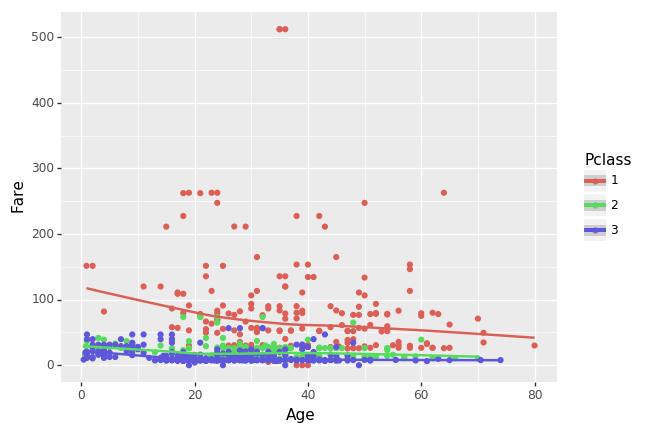

<ggplot: (-9223371890714954201)>

In [93]:
(ggplot(train)
+ aes(x='Age',y='Fare',color='Pclass')
+ geom_point()
+ stat_smooth()
)

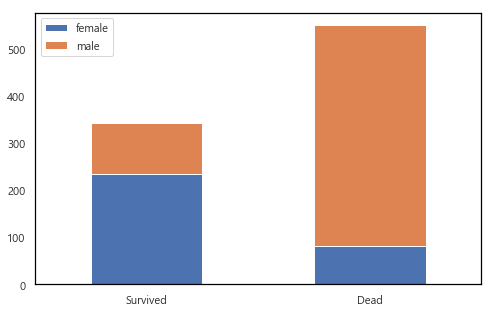

In [115]:
# bar_chart('Sex') 성별에 따른 생존자수를 막대그래프로 시각화
def bar_chart(f):
    survived=train[train['Survived']==1][f].value_counts() # 생존한 사람의 성별 수 출력
    dead=train[train['Survived']==0][f].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    #print(df)
    #df.plot(kind='bar',rot=0) #kind(default=line)
    df.plot(kind='bar',rot=0, stacked=True, figsize=(8,5)) # 그래프를 위아래로 쌓기
    
bar_chart('Sex')

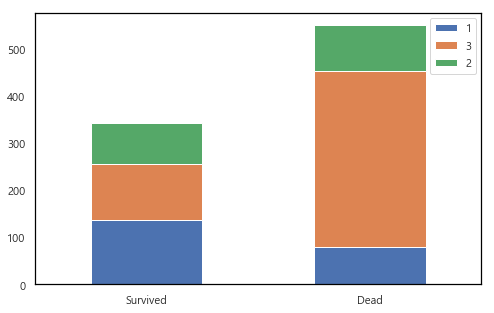

In [116]:
bar_chart('Pclass')

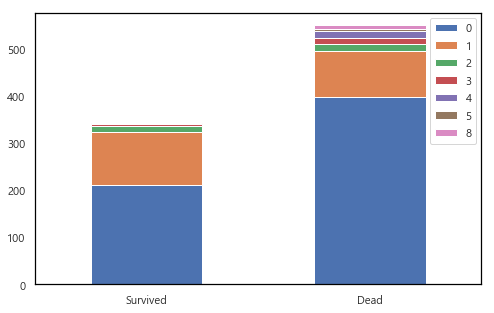

In [117]:
bar_chart('SibSp')

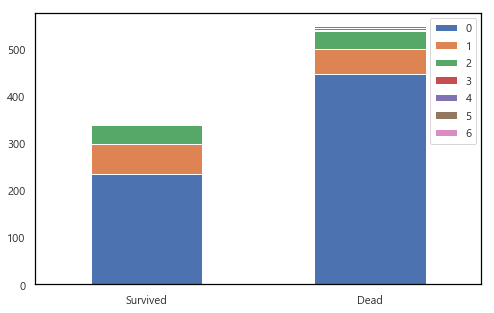

In [118]:
bar_chart('Parch')

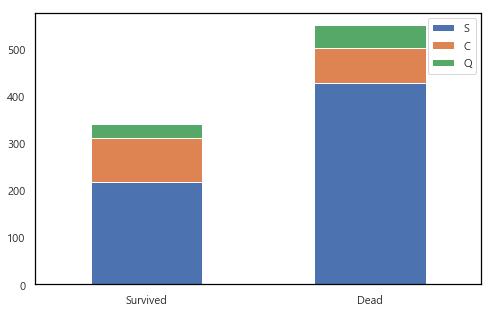

In [119]:
bar_chart('Embarked')

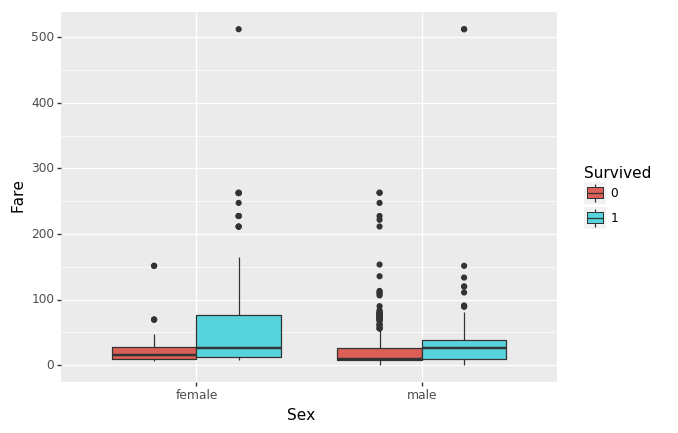

<ggplot: (146143079067)>

In [122]:
# box plot
(ggplot(train)
 +aes(x='Sex',y='Fare',fill='Survived')
 +geom_boxplot()
)

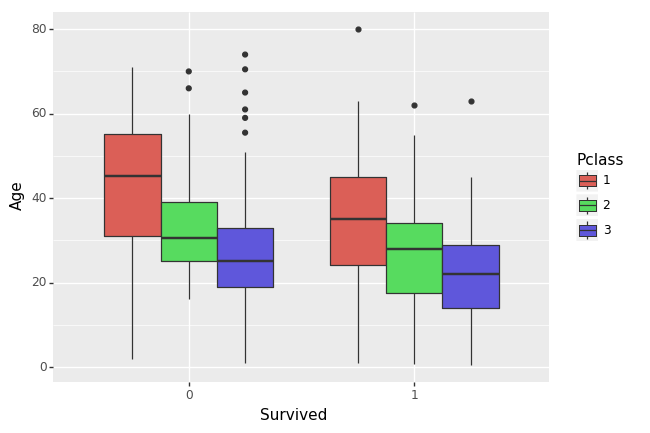

<ggplot: (-9223371890711563383)>

In [123]:
(ggplot(train)
 +aes(x='Survived',y='Age',fill='Pclass')
 +geom_boxplot()
)
# 177개의 NaN은 제거하고 시각화한 것으로 warning 발생
# 전처리하고 다시 시각화하기

In [138]:
# 나이 변수 NaN 값 전처리 
train['Age_median']=train['Age'] # 중앙값
train['Age_mean']=train['Age'] # 평균
train['Age_mode']=train['Age'] #최빈수

train['Age_median']=train['Age_median'].fillna(train['Age_median'].median())
train['Age_mean'].fillna(train['Age_mean'].mean(), inplace=True)
#train.info()

train['Age_mode'].fillna(train['Age_mode'].mode()[0],inplace=True) 
#mode함수는 함수의 수의 결과가 시리즈로 출력되어 mode 값의 위치를 넣어줘야함
#print(type(train['Age_mode'].mode())) 
#print(train['Age_mean'].mean()) 스칼라로 출력
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null category
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Age_median     891 non-null float64
Age_mean       891 non-null float64
Age_mode       891 non-null float64
dtypes: category(1), float64(5), int64(3), object(6)
memory usage: 98.5+ KB


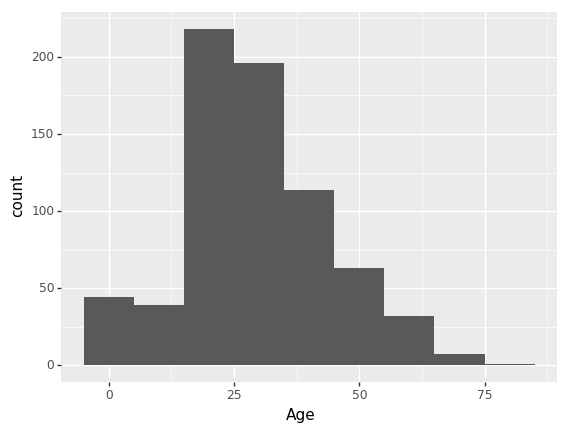

<ggplot: (-9223371890711540199)>

In [145]:
# 연령대별 분포
# 연령대 구간으로 나누어서 각 구간별로 몇 명있는지 분포 조사
(ggplot(train)
+ aes(x='Age')
+ geom_histogram(binwidth=10) # 10개의 구간으로 나누기
) 

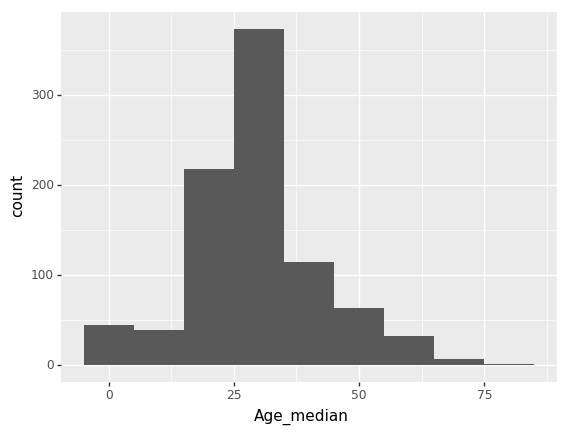

<ggplot: (146143170529)>

In [147]:
# 결측값을 중앙값으로
(ggplot(train)
+ aes(x='Age_median')
+ geom_histogram(binwidth=10) # 10개의 구간으로 나누기
) 

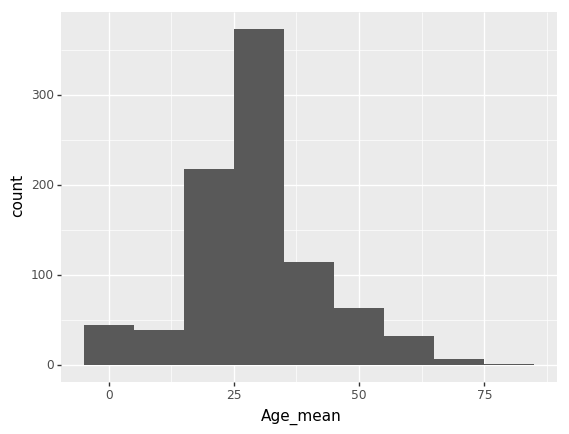

<ggplot: (146143170466)>

In [148]:
(ggplot(train)
+ aes(x='Age_mean')
+ geom_histogram(binwidth=10) # 10개의 구간으로 나누기
) 

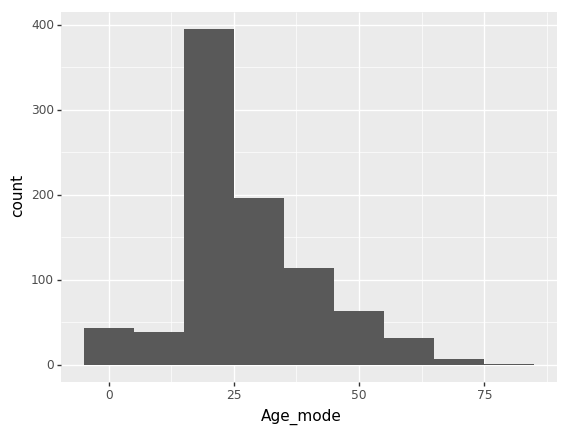

<ggplot: (-9223371890711606861)>

In [149]:
(ggplot(train)
+ aes(x='Age_mode')
+ geom_histogram(binwidth=10) # 10개의 구간으로 나누기
) 

In [158]:
train_test_data=[train,test] # train, test를 합친 리스트 출력
train_test_data
for data in train_test_data:
    print(data['Name'])
# 정규표현식 사용 -> 호칭 추출 -> 호칭별 건수 출력
# 1번 문제
# 출력 예시(train, test)
# Mr   500
# Miss 200
#...
# Sir  1 
# 2번 문제
# 원핫인코딩을 위해 수치로 변환
# Mr:0, Miss:1, Mrs:2. 나머지는 모두 3으로 처리
# 별도의 컬럼을 추가해서 저장
# 카페에 제출..(오늘)

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil